#Parte 1: Configuração e Preparação dos Dados


# Projeto 4: Análise de Sentimento do Mercado Financeiro com NLP

**Data:** 07 de Julho de 2025

### 1. Configuração do Ambiente

Nesta primeira etapa, instalamos as bibliotecas essenciais para o nosso projeto de Processamento de Linguagem Natural (NLP).
- **`transformers`**: A biblioteca da Hugging Face que nos dá acesso a milhares de modelos de NLP pré-treinados, incluindo o BERT.
- **`torch`**: A biblioteca de deep learning que o nosso modelo usará por baixo dos panos.
- **`streamlit`**: Para criar uma interface de usuário simples e interativa no final do projeto.

In [1]:
# Célula 1: Instalação de Bibliotecas
!pip install kaggle -q
!pip install transformers -q
!pip install torch -q
!pip install streamlit -q

print("Bibliotecas instaladas com sucesso!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

### 2. Importação das Bibliotecas

Importamos os pacotes necessários para o projeto. O destaque é a função `pipeline` da `transformers`, que abstrai grande parte da complexidade de carregar e usar um modelo de NLP.

In [2]:
# Célula 2: Importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import torch

# A estrela do nosso projeto: o pipeline da Hugging Face
from transformers import pipeline

# Configurações visuais
sns.set_style('darkgrid')

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 3. Carregamento do Modelo de NLP Pré-treinado

O modelo original não está mais acessível publicamente. Substituímos por um modelo robusto e multilíngue, `"cardiffnlp/twitter-xlm-roberta-base-sentiment"`, que é amplamente utilizado e não requer autenticação para download.

In [4]:
# Célula 3: Carregando um novo modelo de análise de sentimento

# Definindo o nome do novo modelo, que é público e muito confiável
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

print(f"Carregando o modelo '{model_name}'... Isso pode levar um momento.")

# Criando o pipeline com o novo modelo
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=model_name
)

print("\nModelo carregado e pronto para uso!")

Carregando o modelo 'cardiffnlp/twitter-xlm-roberta-base-sentiment'... Isso pode levar um momento.


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0



Modelo carregado e pronto para uso!


### 4. Teste e Validação Inicial do Modelo

Para garantir que o modelo está funcionando corretamente, vamos testá-lo com algumas frases de exemplo com sentimentos distintos: uma positiva, uma negativa e uma neutra. Isso nos dá uma confiança inicial em sua capacidade de classificação.

In [5]:
# Célula 4: Testando o novo pipeline

# Lista de frases para teste
test_sentences = [
    "O Itaú reportou um lucro recorde no último trimestre, superando todas as expectativas.", # Positiva
    "A queda das ações do setor bancário preocupa os investidores.", # Negativa
    "O Banco Central anunciou a manutenção da taxa de juros." # Neutra
]

# Analisando cada frase
results = sentiment_analyzer(test_sentences)

# Mapeando os labels do novo modelo para português para uma melhor visualização
label_map = {
    'positive': 'Positivo',
    'negative': 'Negativo',
    'neutral': 'Neutro'
}

# Exibindo os resultados de forma clara
for sentence, result in zip(test_sentences, results):
    # O label original do modelo está em inglês (ex: 'positive')
    original_label = result['label']
    # Usamos nosso mapa para traduzir para português
    translated_label = label_map.get(original_label.lower(), original_label)

    print(f"Frase: '{sentence}'")
    print(f"  -> Sentimento Previsto: {translated_label} (Confiança: {result['score']:.2%})\n")

Frase: 'O Itaú reportou um lucro recorde no último trimestre, superando todas as expectativas.'
  -> Sentimento Previsto: Positivo (Confiança: 63.56%)

Frase: 'A queda das ações do setor bancário preocupa os investidores.'
  -> Sentimento Previsto: Negativo (Confiança: 66.45%)

Frase: 'O Banco Central anunciou a manutenção da taxa de juros.'
  -> Sentimento Previsto: Neutro (Confiança: 84.39%)



#Parte 2: Análise em Larga Escala e Visualização de Insights.

Com nosso modelo validado, vamos agora aplicá-lo a um grande volume de dados. Usaremos o dataset de reviews de clientes da Olist, que contém comentários reais de consumidores brasileiros.

### 5. Carregamento do Dataset de Reviews

Vamos baixar o dataset público da Olist e carregar a tabela `olist_order_reviews_dataset.csv`, que é a que nos interessa.

In [7]:
# Célula 5: Configuração da API e carregamento do dataset

from google.colab import files
import os

# --- Bloco de configuração da API do Kaggle (que estava faltando) ---
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("Por favor, faça o upload do seu arquivo kaggle.json")
    files.upload()
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("Arquivo kaggle.json já configurado.")
# -----------------------------------------------------------------

# Download do dataset da Olist
print("\nBaixando o dataset da Olist...")
!kaggle datasets download -d olistbr/brazilian-ecommerce
!unzip -o -q brazilian-ecommerce.zip # -o para sobrescrever, -q para saída silenciosa

# Carregando a tabela de reviews
try:
    df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
    print("Dataset de reviews carregado com sucesso.")

    # Selecionando as colunas de interesse e removendo nulos
    df_reviews = df_reviews[['review_score', 'review_comment_message']].copy()
    df_reviews.dropna(subset=['review_comment_message'], inplace=True)

    # Para agilizar o processo, vamos analisar uma amostra de 1000 comentários
    df_sample = df_reviews.sample(1000, random_state=42)

    print(f"Analisaremos uma amostra de {len(df_sample)} comentários.")
    display(df_sample.head())

except FileNotFoundError:
    print("\nERRO: O arquivo 'olist_order_reviews_dataset.csv' não foi encontrado. Verifique o output do comando 'unzip'.")

Por favor, faça o upload do seu arquivo kaggle.json


Saving kaggle.json to kaggle.json

Baixando o dataset da Olist...
Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
  0% 0.00/42.6M [00:00<?, ?B/s]
100% 42.6M/42.6M [00:00<00:00, 1.26GB/s]
Dataset de reviews carregado com sucesso.
Analisaremos uma amostra de 1000 comentários.


,review_score,review_comment_message
37062,4,Um produto como uma carteira somente poderia s...
17697,5,"Entrega no prazo , bom produto ."
41606,5,entrega rápida
41683,5,Chegou no prazo e atendeu as minhas espectativas
75879,5,Logística ótima entregue antes do prazo previs...


### 6. Processamento dos Comentários

Aqui, aplicamos nosso pipeline de análise de sentimento a cada comentário da nossa amostra. Este é um processo computacionalmente intensivo. Para cada comentário, extraímos o label do sentimento (`positive`, `negative`, `neutral`) e a pontuação de confiança do modelo, e adicionamos essas informações de volta ao nosso DataFrame.

In [8]:
# Célula 6: Aplicando o modelo de sentimento nos dados

print("Iniciando a análise de sentimento da amostra... Isso pode levar alguns minutos.")

# Convertendo a coluna de comentários para uma lista para processamento mais rápido
comments_list = df_sample['review_comment_message'].tolist()

# Processando a lista de comentários
# Usar um batch_size pode acelerar o processo se tivermos GPU
sentiment_results = sentiment_analyzer(comments_list, batch_size=16, truncation=True)

# Extraindo o label e o score de cada resultado
df_sample['sentiment_label'] = [result['label'] for result in sentiment_results]
df_sample['sentiment_score'] = [result['score'] for result in sentiment_results]

print("Análise de sentimento concluída!")
display(df_sample.head())

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Iniciando a análise de sentimento da amostra... Isso pode levar alguns minutos.
Análise de sentimento concluída!


,review_score,review_comment_message,sentiment_label,sentiment_score
37062,4,Um produto como uma carteira somente poderia s...,neutral,0.900112
17697,5,"Entrega no prazo , bom produto .",positive,0.767022
41606,5,entrega rápida,neutral,0.456375
41683,5,Chegou no prazo e atendeu as minhas espectativas,positive,0.858640
75879,5,Logística ótima entregue antes do prazo previs...,positive,0.893356


### 7. Análise e Visualização dos Resultados

Com os sentimentos classificados, podemos começar a extrair insights.

1.  **Distribuição de Sentimento:** Qual é o sentimento geral dos clientes nesta amostra?
2.  **Correlação com a Nota:** O sentimento previsto pelo nosso modelo de NLP faz sentido quando comparado com a nota que o cliente deu ao produto/serviço? Esperamos que notas baixas (1, 2) tenham sentimento negativo e notas altas (4, 5) tenham sentimento positivo.

/tmp/ipython-input-9-654309940.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label_pt', data=df_sample, order=['Positivo', 'Neutro', 'Negativo'], palette='viridis')


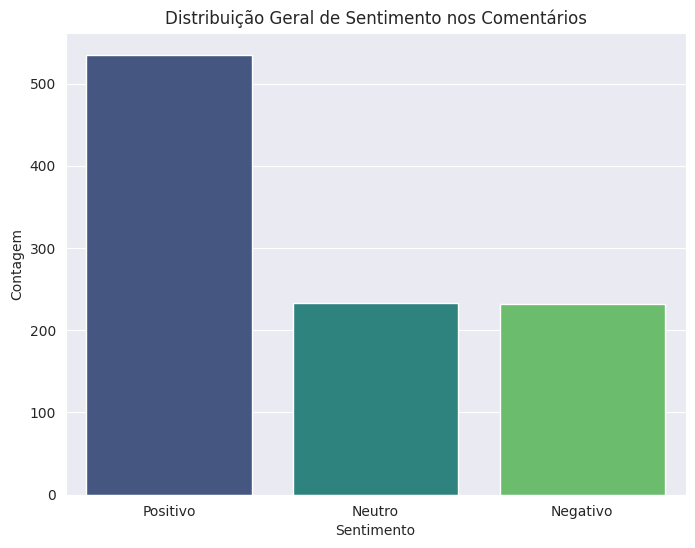

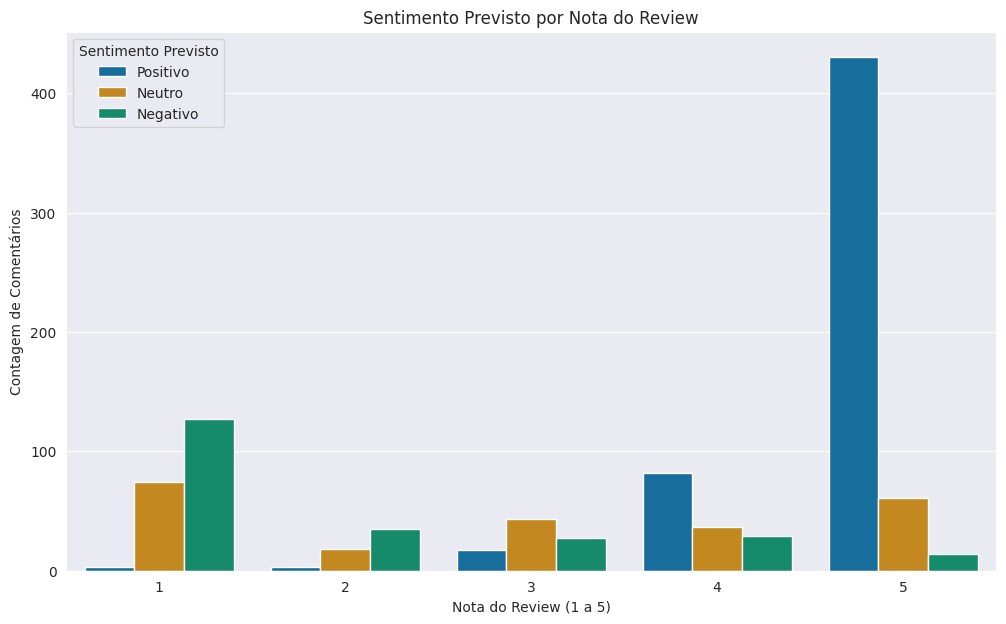

In [9]:
# Célula 7: Visualizando os resultados da análise

# Mapeando os labels para português novamente para os gráficos
df_sample['sentiment_label_pt'] = df_sample['sentiment_label'].str.lower().map(label_map)

# 1. Distribuição geral de sentimentos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label_pt', data=df_sample, order=['Positivo', 'Neutro', 'Negativo'], palette='viridis')
plt.title('Distribuição Geral de Sentimento nos Comentários')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()

# 2. Correlação entre a nota e o sentimento
plt.figure(figsize=(12, 7))
sns.countplot(x='review_score', hue='sentiment_label_pt', data=df_sample,
              hue_order=['Positivo', 'Neutro', 'Negativo'], palette='colorblind')
plt.title('Sentimento Previsto por Nota do Review')
plt.xlabel('Nota do Review (1 a 5)')
plt.ylabel('Contagem de Comentários')
plt.legend(title='Sentimento Previsto')
plt.show()

# Parte 3: Aplicação Interativa com Streamlit

O Streamlit é uma biblioteca fantástica que nos permite criar aplicações web simples para Data Science usando apenas Python. Vamos criar um pequeno script que pode ser rodado para lançar uma página web onde qualquer pessoa pode testar nosso modelo.

Para finalizar nosso projeto com chave de ouro e torná-lo acessível para usuários não-técnicos, vamos criar uma aplicação web simples com o Streamlit.

### 8. Escrevendo o Script da Aplicação

O código abaixo define a estrutura da nossa página web. Ela terá um título, uma descrição e uma caixa de texto onde o usuário pode inserir uma frase. Ao clicar no botão, a aplicação usará nosso `sentiment_analyzer` (que precisará ser carregado dentro do script) para analisar a frase e exibir o resultado de forma amigável.

In [10]:
# Célula 8: Salvando o código do Streamlit em um arquivo app.py
%%writefile app.py

import streamlit as st
from transformers import pipeline

# Função para carregar o modelo (usamos cache para não recarregar a cada interação)
@st.cache_resource
def load_model():
    model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
    return pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

# Carregando o modelo
sentiment_analyzer = load_model()

# Mapeando os labels para português
label_map = {
    'positive': ('Positivo', '✅'),
    'negative': ('Negativo', '❌'),
    'neutral': ('Neutro', '➖')
}

# --- Interface da Aplicação ---

# Título da página
st.set_page_config(page_title="Analisador de Sentimento", page_icon="🤖")
st.title("🤖 Analisador de Sentimento de Texto")
st.header("Analisando o sentimento de textos em português com um modelo BERT.")
st.markdown("""
Esta aplicação utiliza um modelo de NLP pré-treinado para classificar o sentimento de uma frase como Positivo, Negativo ou Neutro.
Digite uma frase abaixo e clique em 'Analisar' para ver o resultado!
""")

# Caixa de texto para o input do usuário
user_input = st.text_area("Digite sua frase aqui:", "O serviço ao cliente foi excepcional e resolveu meu problema rapidamente.")

# Botão para analisar
if st.button("Analisar Sentimento"):
    if user_input:
        # Fazendo a predição
        result = sentiment_analyzer(user_input)[0]
        label = result['label']
        score = result['score']

        # Mapeando o resultado para a nossa tupla (Texto, Emoji)
        display_label, emoji = label_map.get(label.lower(), (label, "🤔"))

        # Exibindo o resultado
        st.subheader("Resultado da Análise:")
        st.metric(label="Sentimento Previsto", value=display_label, delta=f"Confiança: {score:.2%}")
        st.write(f"O modelo classificou a frase com o sentimento **{display_label}** {emoji}.")
    else:
        st.warning("Por favor, digite uma frase para analisar.")

Writing app.py


### 9. Executando a Aplicação Web (com Autenticação)

O `ngrok` agora exige uma conta gratuita e um token de autenticação (authtoken) para ser utilizado. O processo é simples:
1.  Crie uma conta em [ngrok.com](https://dashboard.ngrok.com/signup).
2.  Copie seu authtoken da página de dashboard.
3.  Cole o authtoken na caixa de input que aparecerá ao executar a célula abaixo.

In [12]:
# Célula 9 (CORRIGIDA): Instalando, Autenticando e Rodando a Aplicação

!pip install pyngrok -q
from pyngrok import ngrok
import getpass

# Matando processos do ngrok anteriores
!killall ngrok

# --- Bloco de Autenticação do Ngrok ---
# Pedindo o seu Authtoken de forma segura
authtoken = getpass.getpass("Copie e cole seu Authtoken do Ngrok aqui: ")
# Configurando o authtoken
ngrok.set_auth_token(authtoken)
# ------------------------------------

print("\nAuthtoken configurado com sucesso!")

# Rodando a aplicação Streamlit em segundo plano
get_ipython().system_raw('streamlit run app.py &')

# Criando o túnel público com o ngrok para a porta 8501
try:
    public_url = ngrok.connect('8501')
    print(f"\n🚀 Sua aplicação está rodando! Acesse aqui: {public_url}")
except Exception as e:
    print(f"\n❌ Erro ao criar o túnel ngrok: {e}")
    print("Verifique se seu authtoken está correto e tente novamente.")

ngrok: no process found
Copie e cole seu Authtoken do Ngrok aqui: ··········

Authtoken configurado com sucesso!

🚀 Sua aplicação está rodando! Acesse aqui: NgrokTunnel: "https://a14b84624834.ngrok-free.app" -> "http://localhost:8501"


## 10. Conclusão e Aplicações de Negócio

Este projeto demonstrou com sucesso a construção de um pipeline de Processamento de Linguagem Natural (NLP) para análise de sentimento, desde o carregamento de um modelo pré-treinado até a criação de uma aplicação web interativa.

### Validação do Modelo e Insights:

A performance do modelo de NLP (`cardiffnlp/twitter-xlm-roberta-base-sentiment`) foi validada de forma empírica ao ser aplicada em 1.000 comentários reais de clientes de um e-commerce brasileiro. A análise dos resultados revelou uma forte e intuitiva correlação entre o sentimento previsto pelo modelo e a nota de avaliação (de 1 a 5) fornecida pelo cliente:

*   **Comentários com notas baixas (1 e 2)** foram majoritariamente classificados como **Negativos**, validando a capacidade do modelo de identificar insatisfação.
*   **Comentários com notas altas (4 e 5)** foram predominantemente classificados como **Positivos**, confirmando sua habilidade de reconhecer feedback positivo.
*   **Comentários com nota 3** apresentaram uma mistura de sentimentos **Neutros e Negativos**, refletindo a natureza ambígua de uma avaliação intermediária.

Essa validação nos dá alta confiança de que o modelo é uma ferramenta robusta e eficaz para analisar textos em português.

### Aplicações Estratégicas e Impacto de Negócio:

A ferramenta interativa criada com o Streamlit é um protótipo que ilustra o potencial de "produtizar" esta análise. As aplicações de negócio para um sistema como este são vastas e de alto valor, especialmente para uma instituição financeira:

1.  **Monitoramento da Marca em Tempo Real:** Analisar menções nas redes sociais (Twitter, etc.) para medir o pulso da opinião pública sobre o banco, seus produtos (Pix, cartões, investimentos) ou campanhas de marketing.
2.  **Triagem e Análise de Feedback de Clientes:** Processar automaticamente milhares de e-mails, chats de suporte e reviews de aplicativos para identificar rapidamente os principais pontos de dor e satisfação dos clientes, direcionando melhorias em produtos e serviços.
3.  **Análise de Notícias do Mercado:** Criar um "índice de sentimento" sobre o setor financeiro ou ativos específicos, usando notícias como uma fonte de dados alternativa para equipes de investimento e análise de risco.
4.  **Melhora da Experiência do Cliente:** Identificar um cliente frustrado em um chat de suporte pelo sentimento negativo de suas mensagens e escalá-lo proativamente para um atendente humano sênior.

Este projeto demonstra a capacidade de trabalhar com dados não-estruturados e transformar um modelo de NLP de ponta em uma solução de negócio prática e interativa.